In [1]:
%matplotlib inline
import glob
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import os

from matplotlib.lines import Line2D

**Data Directory**:
<pre>
<code>
data
&nbsp;&nbsp;&nbsp;BraTS20_Training_001
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;BraTS20_Training_001_flair.nii.gz
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;BraTS20_Training_001_seg.nii.gz
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;BraTS20_Training_001_t1.nii.gz
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;BraTS20_Training_001_t1ce.nii.gz
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;BraTS20_Training_001_t2.nii.gz
&nbsp;&nbsp;&nbsp;BraTS20_Training_002
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;........
</code>
</pre>

In [2]:
# Update the ff. should file names or file structure change
t1 = glob.glob('data/Bra*/*t1.nii.gz')
t2 = glob.glob('data/Bra*/*t2.nii.gz')
flair = glob.glob('data/Bra*/*flair.nii.gz')
t1ce = glob.glob('data/Bra*/*t1ce.nii.gz')
seg = glob.glob('data/Bra*/*seg.nii.gz')

In [3]:
titles = ['T1', 'T1CE', 'T2', 'FLAIR']

In [4]:
def get_img_data(img_path):
    return nib.load(img_path).get_fdata()

In [5]:
def plot_modalities(img_data_list, slice_num, cmap):
    if cmap != '':
        plt.set_cmap(cmap)
    f, ax = plt.subplots(1,4,figsize = (19, 5))
    for i in range(4):
        ax[i].set_title(titles[i])
        ax[i].imshow(img_data_list[i][:,:,slice_num])

In [6]:
def plot_seg(img_slice):
    x,y = img_slice.shape
    new_img = np.zeros((x,y,3), dtype=np.uint8)
    seg_colors = ['black', 'red', 'cornflowerblue', 'green']
    seg_labels = ['background', 'necrotic and non-enhancing tumor', 'peritumoral edema', 'enhancing tumor']
    legend_handles = [Line2D([], [], color=c, lw=5) for c in seg_colors]

    for i in range(x):
        for j in range(y):
            if img_slice[i,j] == 1:
                new_img[i,j] = [255,0,0]
            elif img_slice[i,j] == 2:
                new_img[i,j] = [100,149,237]
            elif img_slice[i,j] == 4:
                new_img[i,j] = [0,192,132]  
                
    plt.figure(figsize=(10,5))
    plt.title("SEG (Ground Truth)")
    plt.legend(handles=legend_handles, labels=seg_labels, bbox_to_anchor=(1.85, 1))
    plt.imshow(new_img)

In [7]:
sample_t1 = get_img_data(t1[0])
sample_t1ce = get_img_data(t1ce[0])
sample_t2 = get_img_data(t2[0])
sample_flair = get_img_data(flair[0])
modalities = [sample_t1, sample_t1ce, sample_t2, sample_flair]

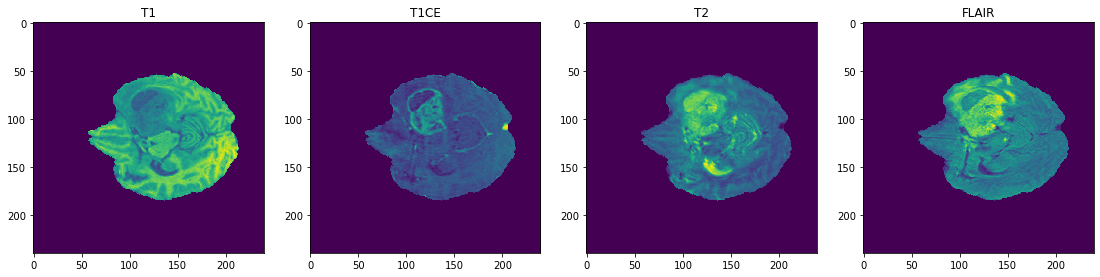

In [8]:
plot_modalities(modalities, slice_num=55, cmap='')

<Figure size 432x288 with 0 Axes>

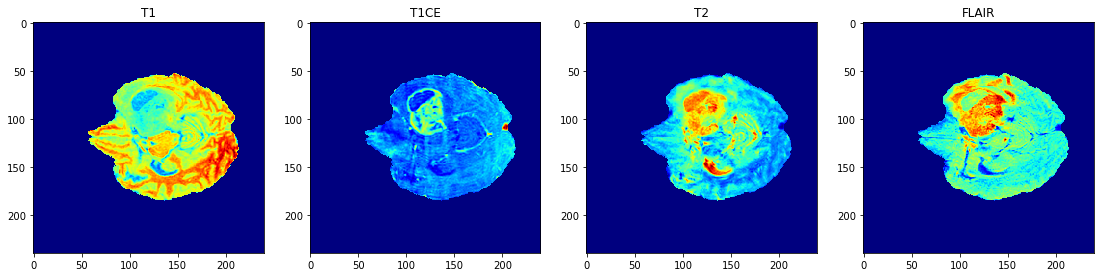

In [9]:
plot_modalities(modalities, slice_num=55, cmap='jet')

<Figure size 432x288 with 0 Axes>

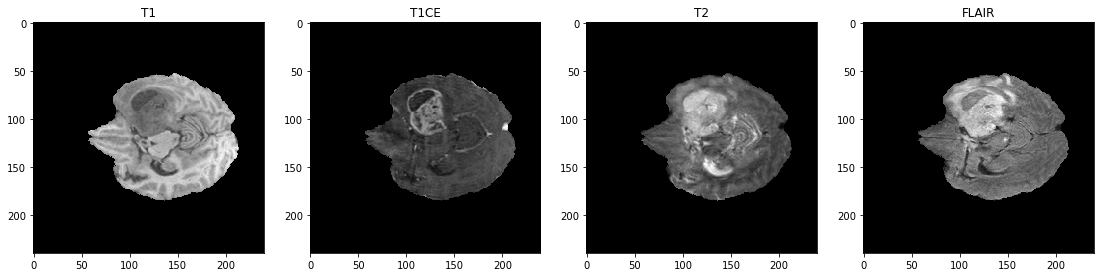

In [10]:
plot_modalities(modalities, slice_num=55, cmap='gray')

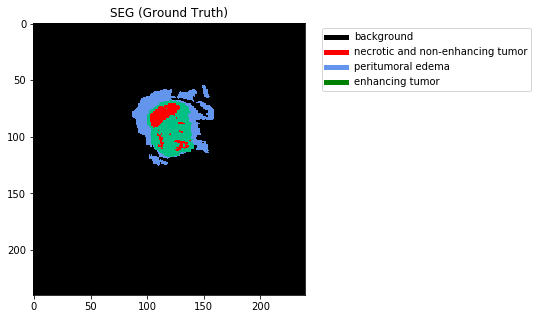

In [11]:
sample_seg = get_img_data(seg[0])
plot_seg(sample_seg[:,:,55]) 

In [12]:
# OPEN for more beautiful plotting of brain images (i.e., GIFs of slices, 3d plots, nilearn plots)

<b>NOTES:</b>

1 – necrotic and non-enhancing tumor (NCR/NET)		
2 – edema (ED)						
4 – enhancing tumor (ET)					
0 – others

In [13]:
def count_seg():
    label_ctr = {"NCR/NET": 0, "ED": 0, "ET": 0}
    
    for y in seg:
        img_data = get_img_data(y)
        label_ctr["NCR/NET"] += np.count_nonzero(img_data == 1)
        label_ctr["ED"] += np.count_nonzero(img_data == 2)
        label_ctr["ET"] += np.count_nonzero(img_data == 4)
        
    return label_ctr

In [14]:
#label_ctr = count_seg()
label_ctr = {"NCR/NET": 8161996, "ED": 21302318, "ET": 7268410}

Text(0.5, 1.0, 'Segmentation Label Distribution')

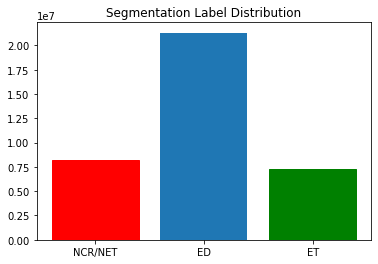

In [15]:
bar_diag = plt.bar(label_ctr.keys(), label_ctr.values())
bar_diag[0].set_color('red')
bar_diag[2].set_color('green')
plt.title("Segmentation Label Distribution")

### Data Augmentation

### Data Normalization

In [16]:
def normalize(img_data):
    mask = img_data > 0
    mean = np.mean(img_data[mask])
    std = np.std(img_data[mask])
    new_img = np.zeros(img_data.shape)
    new_img[mask] = (img_data[mask] - mean) / std
    
    img_max = np.max(new_img[mask])
    img_min = np.min(new_img[mask])
    new_img[mask] = (new_img[mask] - img_min) / (img_max - img_min)
    return new_img


In [17]:
t1_pix = (sample_t1.flatten()[sample_t1.flatten()>0])
t1ce_pix = (sample_t1ce.flatten()[sample_t1ce.flatten()>0])
t2_pix = (sample_t2.flatten()[sample_t2.flatten()>0])
flair_pix = (sample_flair.flatten()[sample_flair.flatten()>0])
modalities_pix = [t1_pix, t1ce_pix, t2_pix, flair_pix]

In [22]:
def plot_pixel_intensity_hist(img_data_list):
    plt.figure(figsize=(17,10))
    for i in range(0,4):
        plt.subplot(2,2,i+1)
        plt.hist(img_data_list[i], bins='sqrt', range=(img_data_list[i].min(), img_data_list[i].max()))
        plt.title(titles[i], fontsize=13)
        plt.xlabel(f"Pixel Intensity, median={np.median(img_data_list[i])}, std={np.std(img_data_list[i])}")
        plt.ylabel("Frequency")
    plt.subplots_adjust(hspace=0.3)

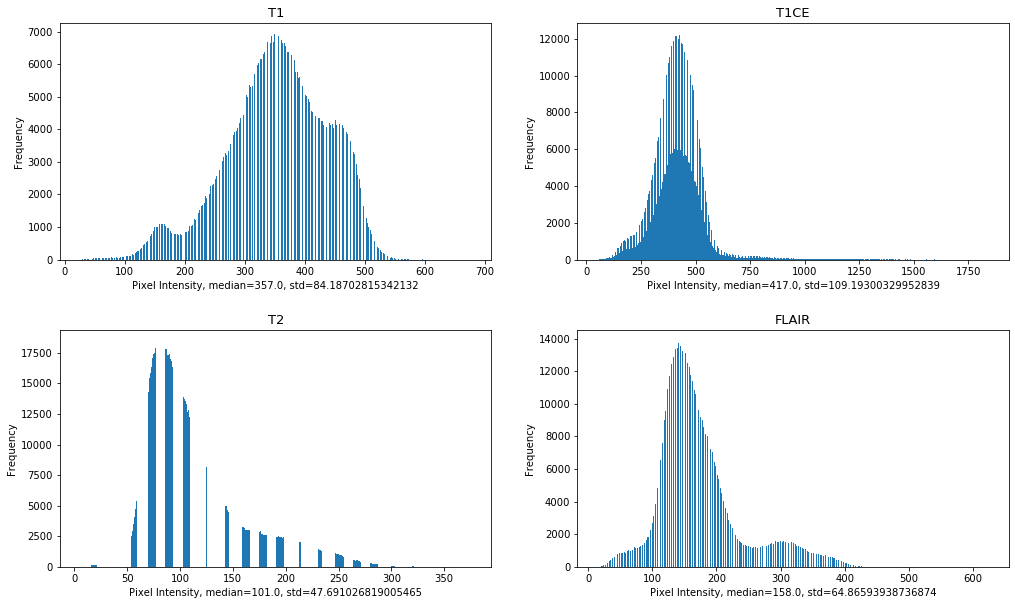

In [23]:
plot_pixel_intensity_hist(modalities_pix)

In [20]:
modalities_pix_norm = [normalize(pix) for pix in modalities_pix]

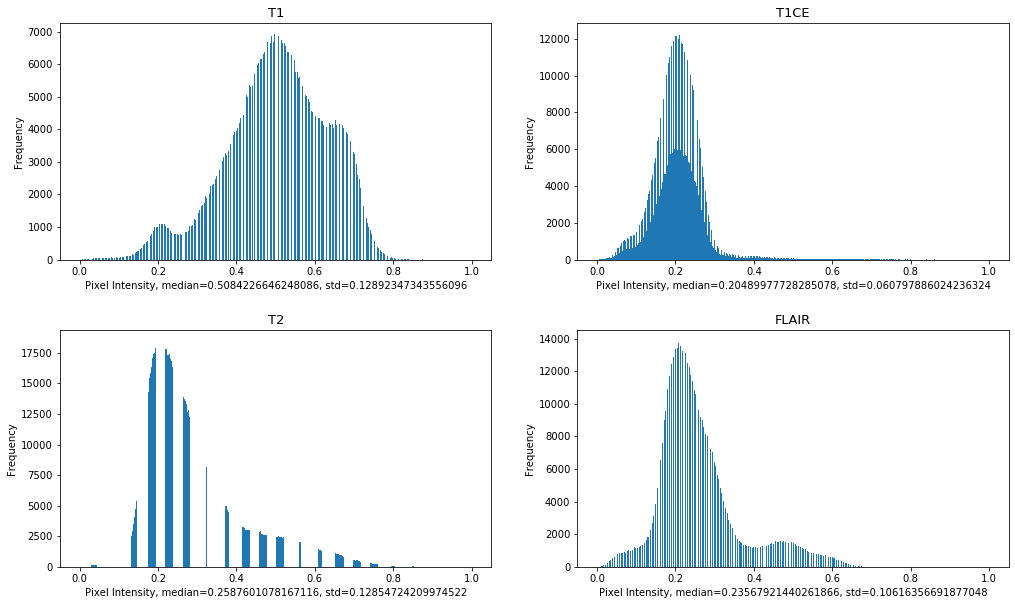

In [24]:
plot_pixel_intensity_hist(modalities_pix_norm)